<a href="https://colab.research.google.com/github/sharithomas/ML-AI/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

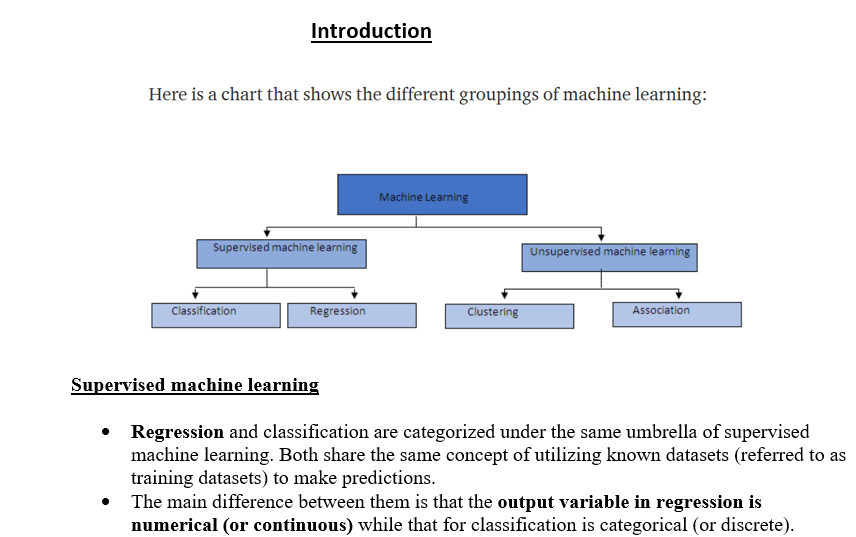



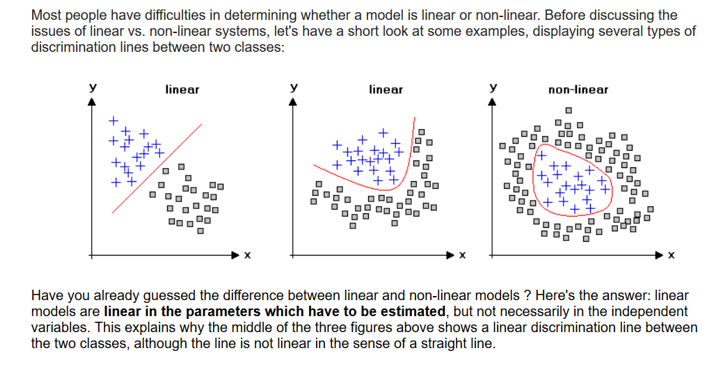

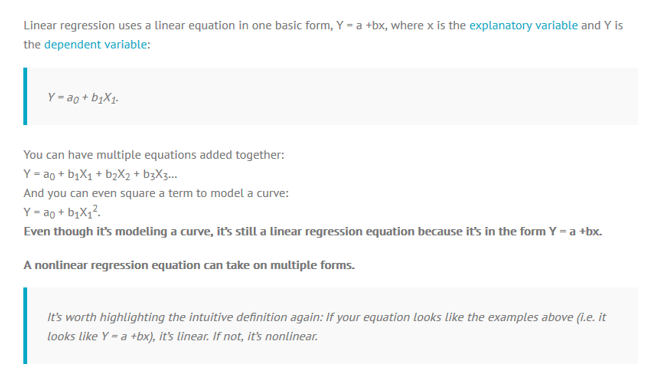

In this part, we will understand and learn how to implement the following Machine Learning Regression models:
1.	Simple Linear Regression
2.	Multiple Linear Regression
3.	Polynomial Regression
4.	Support Vector for Regression (SVR)
5.	Decision Tree Classification
6.	Random Forest Classification

**Simple Linear Regression**

**Linear Regression**

•	It is also called a simple linear regression. It establishes the relationship between two variables using a straight line.

•	Linear regression attempts to draw a line that comes closest to the data by finding the slope and intercept that define the line and minimize regression errors.



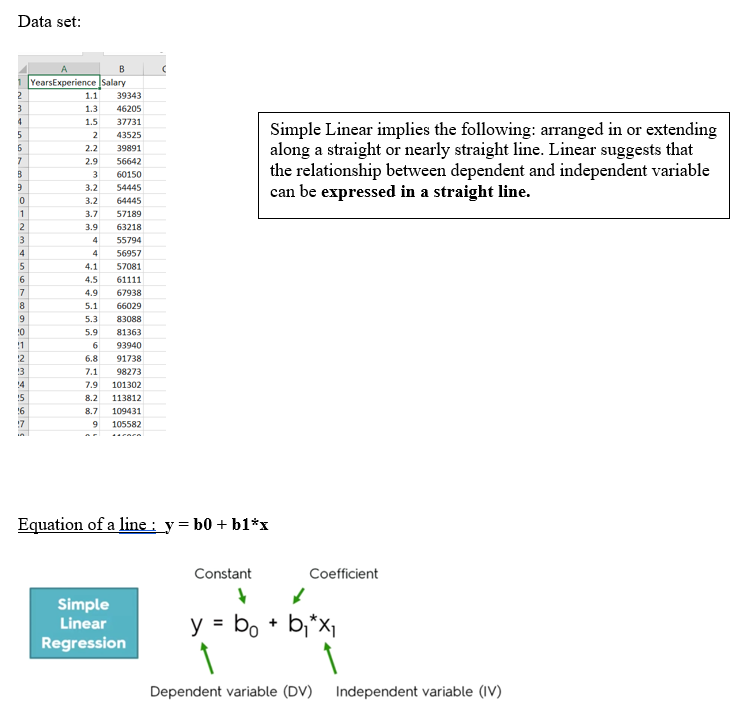

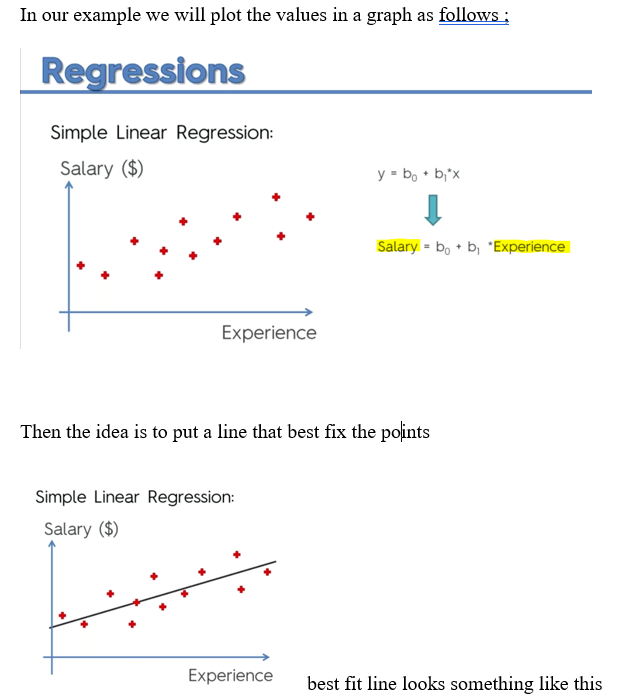

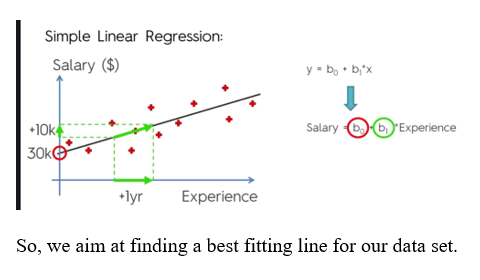

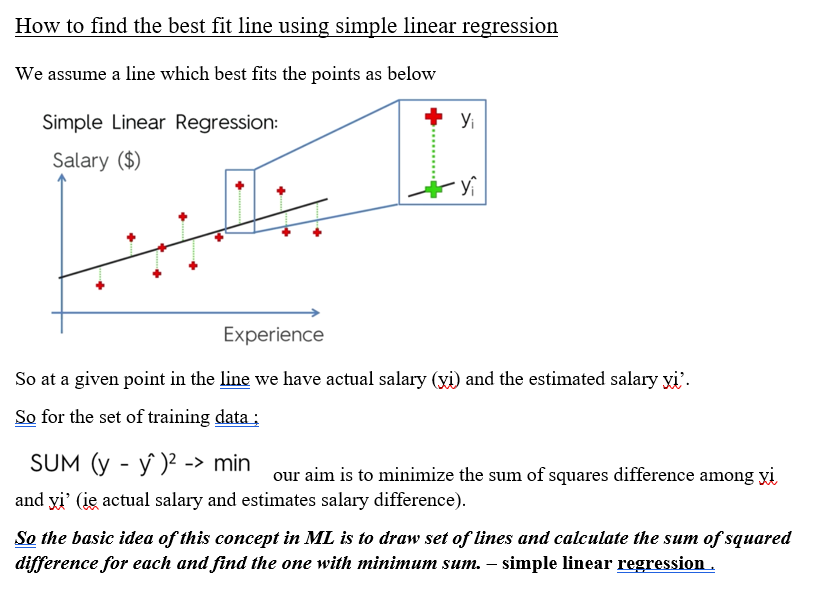

**Exmaple for Linear Regression**

In [14]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
sns.set_color_codes=True

In [16]:
df=pd.read_csv("/content/Housing_Price_170720_test.csv")

In [17]:
df.columns

Index(['Id', 'Length', 'Width', 'Floor', 'Corner', 'Special_Feature',
       'Balcony_Area', 'Price'],
      dtype='object')

In [18]:
df.shape

(625, 8)

In [19]:
df.dtypes

,0
Id,int64
Length,float64
Width,float64
Floor,float64
Corner,int64
Special_Feature,object
Balcony_Area,float64
Price,int64


In [20]:
df.isnull().sum()

,0
Id,0
Length,22
Width,12
Floor,12
Corner,0
Special_Feature,12
Balcony_Area,0
Price,0


In [21]:
#Remove null values
df=df.dropna()
df.isnull().sum()

,0
Id,0
Length,0
Width,0
Floor,0
Corner,0
Special_Feature,0
Balcony_Area,0
Price,0


<Axes: xlabel='Floor'>

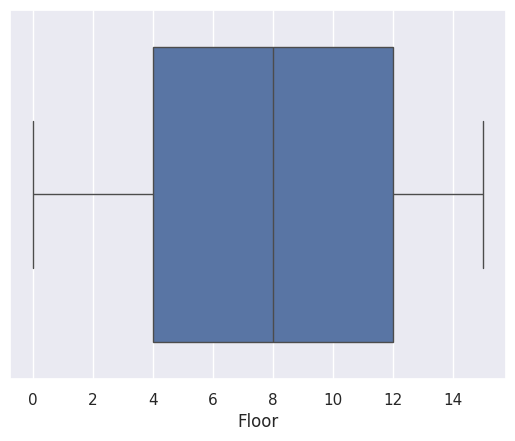

In [22]:
sns.boxplot(x=df['Floor'])

<Axes: xlabel='Length'>

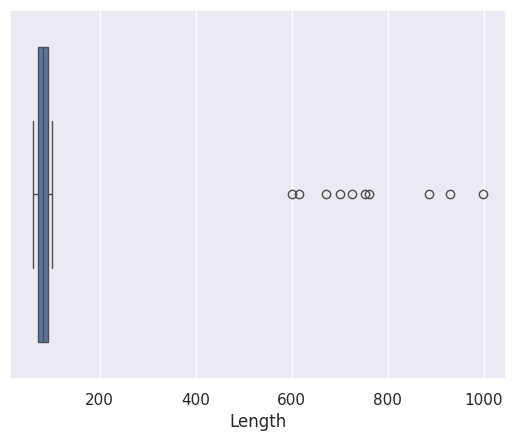

In [23]:
sns.boxplot(x=df['Length'])

In [24]:
#Remove outliers
'''QR (Interquartile Range) in statistics:
IQR = Q3 − Q1

It measures the spread of the middle 50% of the data, giving a sense of variability that is robust to outliers.

Q1 (25th percentile): The value below which 25% of the data fall.

Q3 (75th percentile): The value below which 75% of the data fall.

IQR: Distance between Q3 and Q1.'''

list_out=['Length','Width']
def remove_outlier(df_in,col_name):
    q1=df_in[col_name].quantile(0.25)
    q3=df_in[col_name].quantile(0.75)
    iqr=q3-q1
    fence_low=q1-1.5*iqr
    fence_high=q3+.5*iqr
    df_out=df_in.loc[(df_in[col_name]>fence_low) & (df_in[col_name]<fence_high)]
    return df_out

for var in list_out:
    df=remove_outlier(df,var)

<Axes: xlabel='Width'>

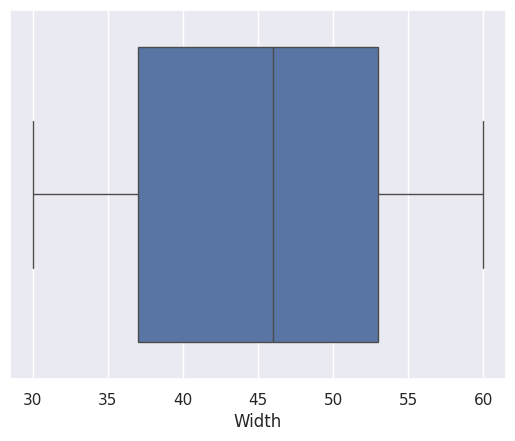

In [25]:
sns.boxplot(x=df['Width'])

In [26]:
df.head()

,Id,Length,Width,Floor,Corner,Special_Feature,Balcony_Area,Price
0,1,75.0,46.0,7.0,1,No Special Feature,292.00,17305326
1,2,86.0,34.0,3.0,0,Pool Facing,281.92,16597430
2,3,97.0,54.0,8.0,0,No Special Feature,425.04,28238886
4,5,92.0,56.0,1.0,0,Mountain Facing,396.16,23244464
5,6,79.0,54.0,5.0,0,Mountain Facing,305.28,23661686


In [27]:
df['Area']=df['Length']*df['Width']
df=df.drop(['Length','Width'],axis=1)
df.head()

,Id,Floor,Corner,Special_Feature,Balcony_Area,Price,Area
0,1,7.0,1,No Special Feature,292.00,17305326,3450.0
1,2,3.0,0,Pool Facing,281.92,16597430,2924.0
2,3,8.0,0,No Special Feature,425.04,28238886,5238.0
4,5,1.0,0,Mountain Facing,396.16,23244464,5152.0
5,6,5.0,0,Mountain Facing,305.28,23661686,4266.0


In [28]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Special_Feature']= le.fit_transform(df['Special_Feature'])

In [29]:
df=df.drop(['Id'],axis=1)

In [30]:
df.head()

,Floor,Corner,Special_Feature,Balcony_Area,Price,Area
0,7.0,1,2,292.00,17305326,3450.0
1,3.0,0,3,281.92,16597430,2924.0
2,8.0,0,2,425.04,28238886,5238.0
4,1.0,0,1,396.16,23244464,5152.0
5,5.0,0,1,305.28,23661686,4266.0


In [31]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)
y_train=df_train.pop('Price')
X_train=df_train

In [32]:
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_lm).fit()
lr.params

,0
const,847275.504945
Floor,-25745.097362
Corner,308309.444677
Special_Feature,-285970.416124
Balcony_Area,2552.204201
Area,4738.166681


In [33]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     306.1
Date:                Mon, 07 Jul 2025   Prob (F-statistic):          3.95e-130
Time:                        06:35:51   Log-Likelihood:                -6146.2
No. Observations:                 382   AIC:                         1.230e+04
Df Residuals:                     376   BIC:                         1.233e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            8.473e+05   5.45e+05      1.556      0.121   -2.24e+05    1.92e+06
Floor           -2.575e+04   2.69e+04     -0.959      0.338   -7.86e+04    2.71e+04
Corner           3.083e+05   3.12e+05      0.987      0.324   -3.06e+05    9.23e+05
Special_Feature  -2.86e+05    1.1e+05     -2.603      0.010   -5.02e+05   -6.99e+04
Balcony_Area     2552.2042   4350.634      0.587      0.558   -6002.419    1.11e+04
Area             4738.1667    364.841     12.987      0.000    4020.783    5455.551
==============================================================================
Omnibus:                      209.124   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.870
Skew:                           0.194   Prob(JB):                     3.98e-06
Kurtosis:                       1.812   Cond. No.                     1.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Analysis of results

1)f-stati=mssb/mssw

= mean sum of squares between group/mean sum of squares within group

, f should big as possible so that mssb should high(more variance) and mssw should low.

f-ststi>20 consider as good

2) probability of f-stati<0.05 or near to zero is consider as confident model

In [34]:
y_test=df_test.pop('Price')
X_test=df_test
X_test_lm=sm.add_constant(X_test)

In [35]:
# Predicting on test data
y_pred_lm=lr.predict(X_test_lm)

In [36]:
#Calculating R² score on test data
r2=r2_score(y_test,y_pred_lm)
r2

0.7760279304683598

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# . Calculating VIF to detect multicollinearity
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.17
5,Area,8.34
4,Balcony_Area,8.32
1,Floor,1.01
3,Special_Feature,1.01
2,Corner,1.00


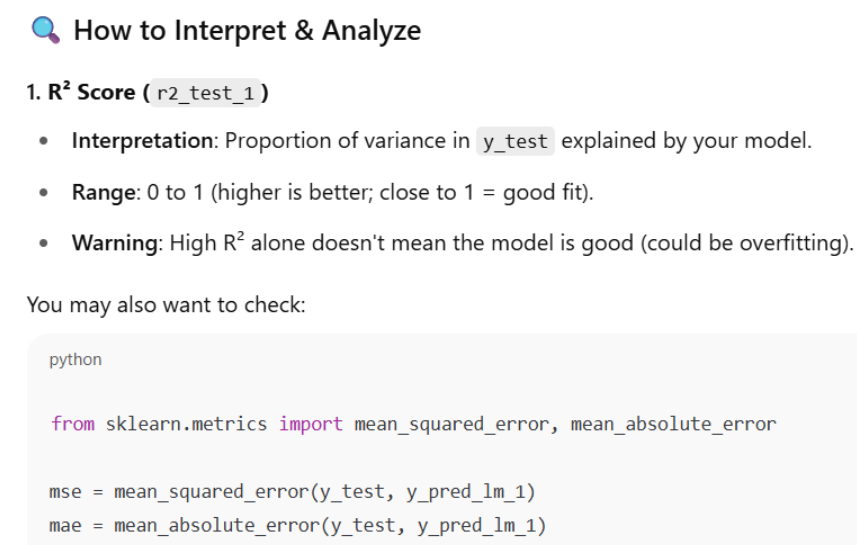

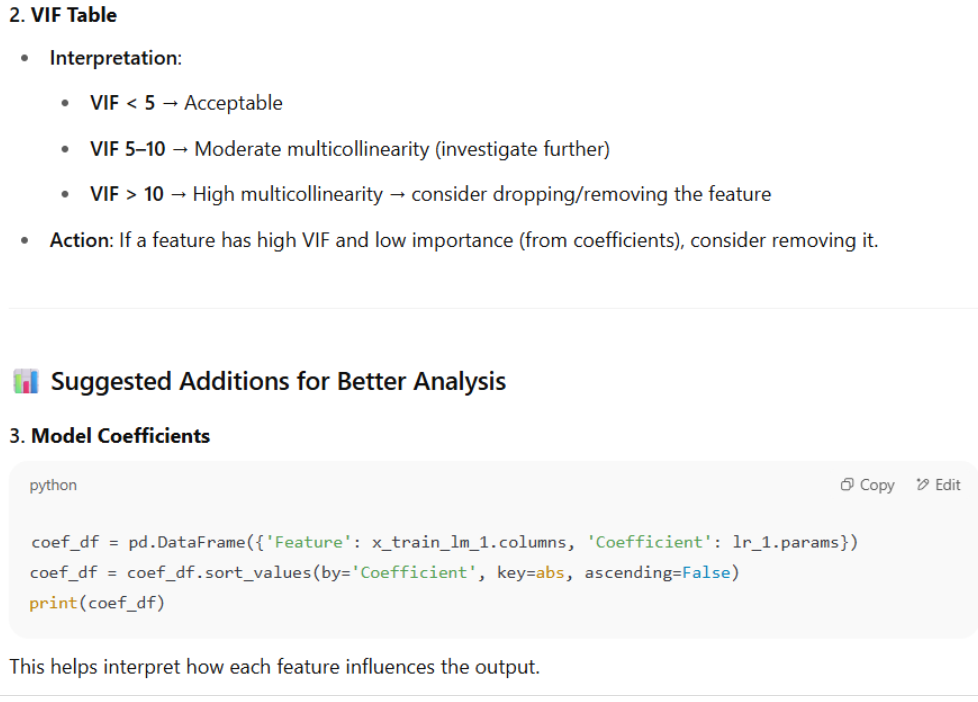

In [38]:
'''highest p value for balcony_area=0.558 among all features so drop that first

p-value high means less significance on target value so drop such variable one by one and

check for r2 and adjr2 for its impact'''
X_train_lm_1=X_train_lm.drop(['Balcony_Area'],axis=1)

In [40]:
lr_1=sm.OLS(y_train,X_train_lm_1).fit()
lr_1.params

,0
const,864624.063071
Floor,-25564.667853
Corner,302652.391670
Special_Feature,-288925.792554
Area,4938.889435


In [41]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     383.2
Date:                Mon, 07 Jul 2025   Prob (F-statistic):          2.25e-131
Time:                        06:46:37   Log-Likelihood:                -6146.4
No. Observations:                 382   AIC:                         1.230e+04
Df Residuals:                     377   BIC:                         1.232e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            8.646e+05   5.43e+05      1.591      0.112   -2.04e+05    1.93e+06
Floor           -2.556e+04   2.68e+04     -0.953      0.341   -7.83e+04    2.72e+04
Corner           3.027e+05   3.12e+05      0.970      0.333   -3.11e+05    9.16e+05
Special_Feature -2.889e+05    1.1e+05     -2.635      0.009   -5.05e+05   -7.33e+04
Area             4938.8894    126.511     39.039      0.000    4690.134    5187.645
==============================================================================
Omnibus:                      220.399   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.102
Skew:                           0.191   Prob(JB):                     3.54e-06
Kurtosis:                       1.804   Cond. No.                     1.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
X_test_lm_1=X_test_lm.drop(['Balcony_Area'],axis=1)
y_pred_lm_1=lr_1.predict(X_test_lm_1)
r2_test_1=r2_score(y_test,y_pred_lm_1)

In [43]:
r2_test_1

0.7763946420744736

In [44]:
vif=pd.DataFrame()
vif['Features']=X_train_lm_1.columns
vif['VIF']=[variance_inflation_factor(X_train_lm_1.values, i) for i in range(X_train_lm_1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values('VIF',ascending=False)
vif

,Features,VIF
0,const,20.11
1,Floor,1.01
3,Special_Feature,1.01
2,Corner,1.00
4,Area,1.00


In [45]:
X_train_lm_2=X_train_lm_1.drop(['Floor'],axis=1)

In [46]:
lr_2=sm.OLS(y_train,X_train_lm_2).fit()
lr_2.params
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     510.8
Date:                Mon, 07 Jul 2025   Prob (F-statistic):          1.44e-132
Time:                        06:48:32   Log-Likelihood:                -6146.9
No. Observations:                 382   AIC:                         1.230e+04
Df Residuals:                     378   BIC:                         1.232e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.717e+05   5.04e+05      1.332      0.184    -3.2e+05    1.66e+06
Corner           3.126e+05   3.12e+05      1.003      0.317      -3e+05    9.26e+05
Special_Feature -2.829e+05   1.09e+05     -2.584      0.010   -4.98e+05   -6.77e+04
Area             4935.2397    126.437     39.033      0.000    4686.631    5183.849
==============================================================================
Omnibus:                      222.507   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.176
Skew:                           0.192   Prob(JB):                     3.41e-06
Kurtosis:                       1.802   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
X_test_lm_2=X_test_lm_1.drop(['Floor'],axis=1)
y_pred_lm_2= lr_2.predict(X_test_lm_2)
r2_test_2=r2_score(y_test,y_pred_lm_2)

In [48]:
r2_test_2

0.7785045955954959

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2.values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.31
1,Corner,1.00
2,Special_Feature,1.00
3,Area,1.00


In [50]:
X_train_lm_3 = X_train_lm_2.drop(["Corner"], axis=1)
lr_3 = sm.OLS(y_train, X_train_lm_3).fit()
lr_3.params
print(lr_3.summary())

X_test_lm_3 = X_test_lm_2.drop(["Corner"], axis=1)
y_pred_test_lm_3 = lr_3.predict(X_test_lm_3)
r2_test_3 = r2_score(y_test, y_pred_test_lm_3)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     765.7
Date:                Mon, 07 Jul 2025   Prob (F-statistic):          7.60e-134
Time:                        06:49:57   Log-Likelihood:                -6147.4
No. Observations:                 382   AIC:                         1.230e+04
Df Residuals:                     379   BIC:                         1.231e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7.072e+05   5.03e+05     

In [51]:
#Predict using Sklearn
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print("Slope: ",regressor.coef_)
print("Intercept: ",regressor.intercept_)

Slope:  [ -25745.09736215  308309.44467738 -285970.41612441    2552.20420122
    4738.16668134]
Intercept:  847275.5049449019


In [52]:
X_train.columns

Index(['Floor', 'Corner', 'Special_Feature', 'Balcony_Area', 'Area'], dtype='object')

In [53]:
## Predicting the Test set results
y_pred_train=regressor.predict(X_train)
y_pred_test=regressor.predict(X_test)
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)

In [54]:
r2_train

0.8027893844686846

In [55]:
r2_test

0.7760279304683595

In [56]:
#
X_train_1=X_train.drop(["Balcony_Area"],axis=1)
regressor_1 = LinearRegression()
regressor_1.fit(X_train_1, y_train)
print('Slope:' ,regressor_1.coef_)
print('Intercept:', regressor_1.intercept_)

X_test_1=X_test.drop(["Balcony_Area"],axis=1)

# Predicting the Test set results
y_pred_train_1 = regressor_1.predict(X_train_1)
y_pred_test_1 = regressor_1.predict(X_test_1)

r2_train_1 = r2_score(y_train, y_pred_train_1)
r2_test_1 = r2_score(y_test, y_pred_test_1)


Slope: [ -25564.66785253  302652.39167029 -288925.79255443    4938.88943465]
Intercept: 864624.0630708523


In [57]:
X_train_2=X_train_1.drop(["Floor"],axis=1)
regressor_2 = LinearRegression()
regressor_2.fit(X_train_2, y_train)

print('Slope:' ,regressor_2.coef_)
print('Intercept:', regressor_2.intercept_)
X_test_2=X_test_1.drop(["Floor"],axis=1)

# Predicting the Test set results
y_pred_train_2 = regressor_2.predict(X_train_2)
y_pred_test_2 = regressor_2.predict(X_test_2)

r2_train_2 = r2_score(y_train, y_pred_train_2)
r2_test_2 = r2_score(y_test, y_pred_test_2)

Slope: [ 312628.32535615 -282880.2774779     4935.23973979]
Intercept: 671732.0822648704


In [58]:
X_train_3=X_train_2.drop(["Corner"],axis=1)
regressor_3 = LinearRegression()
regressor_3.fit(X_train_3, y_train)

print('Slope:' ,regressor_3.coef_)
print('Intercept:', regressor_3.intercept_)

X_test_3=X_test_2.drop(["Corner"],axis=1)
# Predicting the Test set results
y_pred_train_3 = regressor_3.predict(X_train_3)
y_pred_test_3 = regressor_3.predict(X_test_3)

r2_train_3 = r2_score(y_train, y_pred_train_3)

r2_test_3 = r2_score(y_test, y_pred_test_3)

Slope: [-282064.21354923    4941.03686027]
Intercept: 707245.302763179
